# Least Squares

In this notebook you'll use least squares to estimate a state vector $x$, given $m$ noisy measurements derived from:

$
\tilde{y} = Hx + v
$

$v$ is sampled from gaussian $N(0, R)$, and $H$ is a matrix mapping the state space to the measurement space. We'll assume x is constant, meaning the vehicle is currently not moving.

Thus you'll want to select an estimate of the state $x$, $\hat{x}$ which maximizes the likelihood of the observed measurements $\tilde{y}$:

$
p(y = \tilde{y} | x = \hat{x})
$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as LA

%matplotlib inline

### Setup

In [2]:
# number of samples
# the larger this value the more
# accurate the x hat will be.
n_samples = 100

# size of state
n = 4

In [3]:
def make_H(m, degree, t):
    """
    Creates a matrix where
    each row is of the form:
    
        [t**degree, t**(degree-1), ..., 1]
    """
    H = np.zeros((m, degree))
    for i in np.arange(degree-1, -1, -1):
        H[:, -i-1] = t**i
    return H

状态变量 x 是一个矩阵常值向量，这也说明了为什么最小二乘估计只能针对静止的状态。x（的维度n）决定了映射矩阵 H 的复杂程度。    
而 t 是什么？ t 的作用是产生多项式的变量部分（x 是多项式的系数）。

In [4]:
# known constants
t = np.random.uniform(-5, 5, n_samples)
H = make_H(n_samples, n, t)

# state, unknown in practice
x = np.random.randn(n) * 2

print(t)

[ 0.53283582  0.35582538 -3.89106096 -4.07316602 -3.76303366 -3.54300456
 -1.39384102  2.93276846  1.17343648 -4.43133227  3.54783859 -3.97047365
  4.04018089 -1.69799948  0.51063032 -4.28633032  0.30882878 -0.98022054
 -2.19491439 -2.73402719  2.30817049 -4.66111753  1.40225144  4.52203139
  0.18207475 -0.43527062  4.16785971  4.92317947 -3.39200292  3.53032201
  4.4969206   0.75720164 -4.82494916 -4.17775592 -2.92633062  1.97505745
 -4.01081225  3.86526171  3.25598227 -2.75154669  0.71233681  1.54451494
 -2.7944621   2.30891691 -1.03352328 -4.60800677  2.9639927  -3.04767813
 -1.78184627  3.4577588  -0.75555414 -2.72263335 -3.20274068  1.19180596
  0.23699962 -1.44558603  1.63081914 -3.47576374  3.84276686 -2.39222882
  0.09147982  0.5016146  -0.89806214 -4.60435569 -1.95770394 -4.09948751
  4.33659736  4.59326688  4.79700822 -1.34733858 -1.34392899 -0.32208035
  2.57902554  1.76238954 -4.21299191  4.07912543 -3.73837086 -3.48009688
 -2.93596344 -4.24427999  3.4338307   2.31247822 -1

### Collecting Observations

First you'll have to collect $m$ noisy observations, these will be used later to estimate $x$.

**NOTE: You may have not encountered the `@` syntax. In a nutshell, `np.dot(H, x)` is equivalent to `H @ x`. If the equation contains multiple matrix multiplications, using `@` provides a much more comprehensible expression. **

In [5]:
# TODO: collect m noisy observations, the noise distribution should be gaussian
y_obs = H @ x + np.random.normal(0, 1, size=(n_samples))

Text(0.5,1,'Noisy Observations')

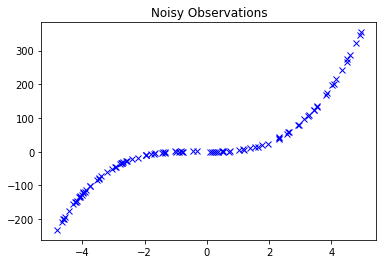

In [6]:
plt.plot(t, y_obs, 'bx')
plt.title("Noisy Observations")

The observations plot produces a polynomial of order `len(x) - 1`, i.e. a 4-element state produces a 3rd order polynomial. In this case the state $x$ are the coefficients of the polynomial. （一个包含4个元素的状态变量将产生一个三阶多项式，并且x为该多项式的系数。）By generating observation from evaluating the polynomial at several different points we can gain a good approximation of the original state.

As one might imagine, recovering a good approximation of the state requires more samples as the order of the polynomial increases.

### Estimating $x$ 

Given enough samples $\hat{x}$ should converge to $x$. The exact number of measurements required depends on the complexity of mapping the state space to the measurement space, $H$ and how noisy the measurements are, determined by $v$.

Recall from lecture:

$
\hat{x} = (H^T H)^{-1} H^T \tilde{y}
$

$\hat{x}$ should be similar to $x$.

In [7]:
## TODO: calculate x_h
x_hat = LA.pinv(H.T @ H) @ H.T @ y_obs

In [8]:
print(x_hat)
print(x)

[ 2.52035523  2.08146131 -0.78779079 -0.17635722]
[ 2.51333454  2.07335742 -0.69628829 -0.14558663]


[Solution](./Least-Squares-Solution.ipynb)